# Heuristic Compatibility Testing

In [2]:
# Import Libraries
import sys
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src import heuristics


mpl.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 20,
    'axes.titlesize': 32,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 20,
    'figure.titlesize': 28,
    'axes.grid': False,
    'grid.color': 'grey',
    'grid.linestyle': '--',
    'grid.linewidth': 1.0,
})

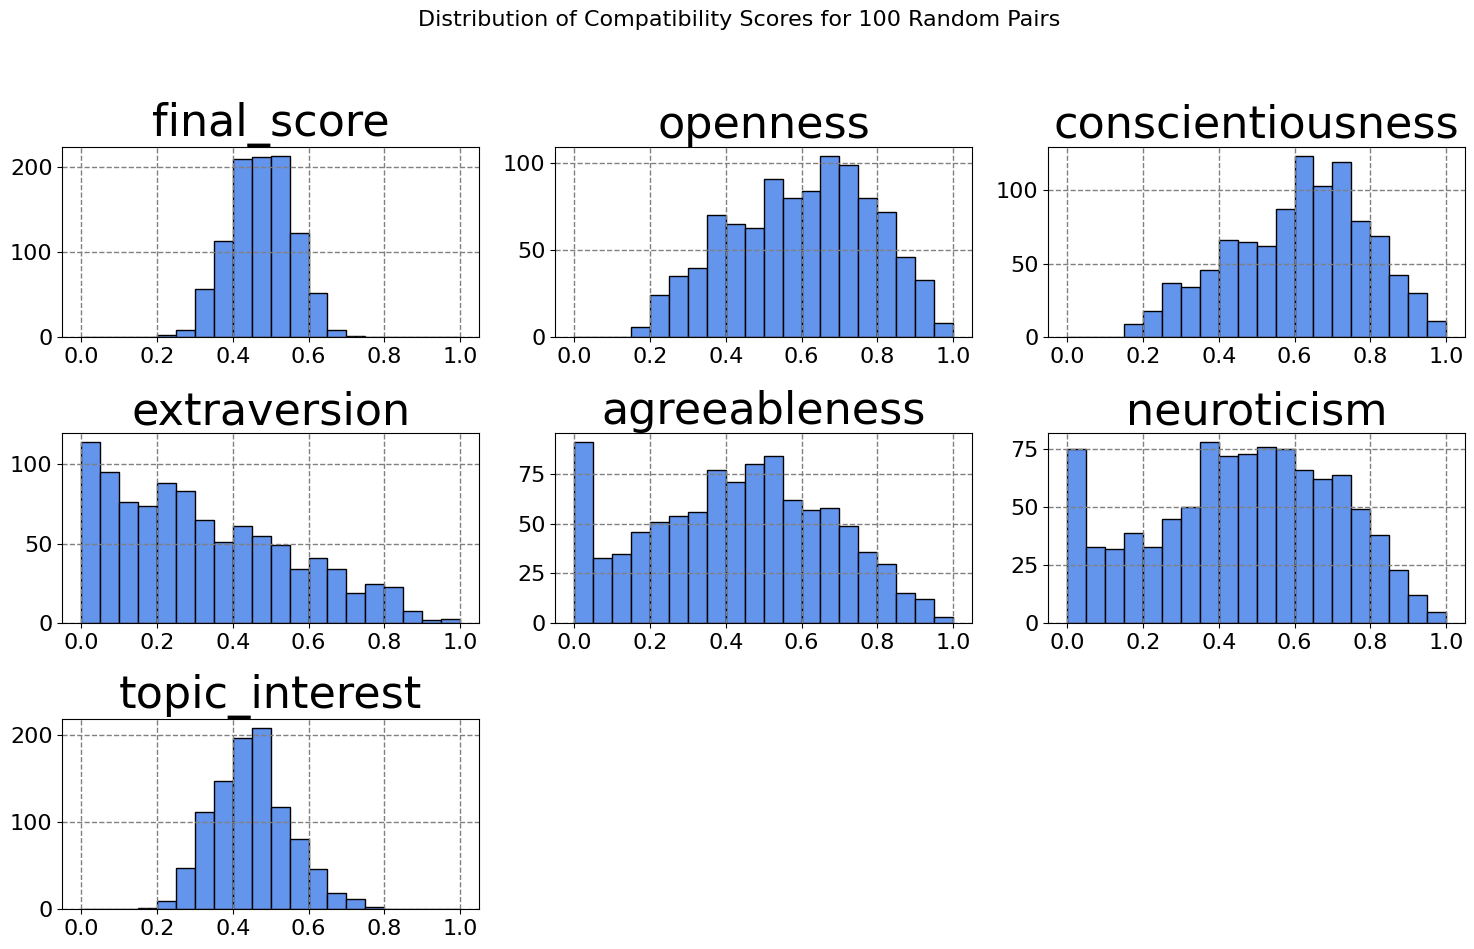

In [7]:
num_pairs = 1000
mock_topic_vec = [0.5, 0.5, 0.5, 0.5, 0.5]
mock_topic_vec = [0.6, 0.3, 0.1, 0.1, 0.9]

results = {"final_score": [],
           "openness": [],
           "conscientiousness": [],
           "extraversion": [],
           "agreeableness": [],
           "neuroticism": [],
           "topic_interest": []}

for _ in range(num_pairs):

    engagement = np.random.rand() - 0.5
    vader_score = (np.random.rand() - 0.5) * 0.2
    mock_analysis_results = {
        "topic_vector": mock_topic_vec,
        "engagement_score": engagement + vader_score}

    p1 = np.random.rand(5).tolist()
    p2 = np.random.rand(5).tolist()

    result = heuristics.calculate_heuristic_score(p1, p2, mock_analysis_results, vader_score)

    results["final_score"].append(result["match_score"])
    
    breakdown = result["breakdown"]
    results["openness"].append(breakdown["openness"])
    results["conscientiousness"].append(breakdown["conscientiousness"])
    results["extraversion"].append(breakdown["extraversion"])
    results["agreeableness"].append(breakdown["agreeableness"])
    results["neuroticism"].append(breakdown["neuroticism"])
    results["topic_interest"].append(breakdown["topic_interest"])

results_df = pd.DataFrame(results)

results_df.hist(bins=20, figsize=(15, 10), layout=(3, 3), color='cornflowerblue', edgecolor='black', range=(0, 1))
plt.suptitle('Distribution of Compatibility Scores for 100 Random Pairs', size=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()